Desafio:
 

Base de dados Bias correction of numerical prediction model temperature forecast Data Set da UCI:

 - Fazer uma análise descritiva dos dados explicando aspectos fundamentais, tais como a distribuição dos dados e correlação entre as variáveis. 
 - Fazer sugestões, alterações e transformações que achar necessárias a fim de facilitar o entendimento do problema.
 - Treinar e avaliar um modelo de Machine Learning para fazer a estimação da variável Next_Tmax, explicando a qualidade do modelo a partir das métricas de avaliação utilizadas. Como métricas de avaliação, sugerimos como obrigatórias a accuracy, precision e recall. Mas você fica livre de avaliar outras métricas que sejam oportunas de acordo com seu julgamento e necessidade na avaliação do modelo.
 

Por fim, queremos ouvir de você o que poderia ser feito de diferente se tivesse mais tempo e mais recursos. Quais outros testes e análises poderiam ser feitas e qual a importância destas.

### Data Set Information
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Atribute information

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

For more information, read [Cho et al, 2020].

# 0 - Pré-processamento de dados

In [1]:
import pandas as pd
data = pd.read_csv('Bias_correction_ucl.csv')

In [2]:
#descrição do data set original - aqui comecei a comparar o máximo e mínimo com as informações que foram 
#determinadas em "Atribute Information"
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7.752000e+03,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,1546.302127,111773.761120,35646.533419,165.050779,1.993474e+04,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,7380.471244,41224.995794,64367.055288,563.623681,2.871933e+05,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.910000,12.370000,0.098475,4.329521e+03,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126909.000000,30.046400,0.271300,4.999019e+03,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126991.000000,56.444800,0.623300,5.437352e+03,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127042.000000,35038.000000,2.534800,5.728645e+03,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37645.000000,127135.000000,212335.000000,2785.000000,5.868875e+06,38.900000,29.800000


In [3]:
#existe indício de dados faltantes em muitos atributos

data.count()

station             7750
Date                7750
Present_Tmax        7682
Present_Tmin        7682
LDAPS_RHmin         7677
LDAPS_RHmax         7677
LDAPS_Tmax_lapse    7677
LDAPS_Tmin_lapse    7677
LDAPS_WS            7677
LDAPS_LH            7677
LDAPS_CC1           7677
LDAPS_CC2           7677
LDAPS_CC3           7677
LDAPS_CC4           7677
LDAPS_PPT1          7677
LDAPS_PPT2          7677
LDAPS_PPT3          7677
LDAPS_PPT4          7677
lat                 7752
lon                 7752
DEM                 7752
Slope               7752
Solar_radiation     7752
Next_Tmax           7725
Next_Tmin           7725
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
data.isna().sum()

#A entradas com dados faltantes representam menos de 1% do total, sendo assim optei 
#por retirar as entradas com dados faltantes.

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar_radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
import numpy as np 

data = data.dropna()
data.head(20)

# Provavelmente a localização geográfica vai interferir na temperatura máxima. 
#Além disso, podemos notar que existem valores fora do padrão na latitude e longitude.

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126991.00,212335.0000,2785.0000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127032.00,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127058.00,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37645.0000,127022.00,45716.0000,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127135.00,35038.0000,0.5055,5859.552246,31.2,22.5
5,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127042.00,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,2013-06-30,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126838.00,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.91,52518.0000,1.5629,5863.992188,31.1,22.9
8,9.0,2013-06-30,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126826.00,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,2013-06-30,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126955.00,208507.0000,5.1782,5893.608398,30.5,21.0


In [7]:
for i in range(1,25):
    print(data[data.station==i].lat.unique())    
#Station 4 apresenta latitude fora do padrão

[37.6046]
[37.6046]
[37.5776]
[37645.]
[37.5507]
[37.5102]
[37.5776]
[37.4697]
[37.4967]
[37.4562]
[37.5372]
[37.5507]
[37.5776]
[37.4967]
[37.5507]
[37.4697]
[37.6181]
[37.4832]
[37.5776]
[37.6181]
[37.5507]
[37.5102]
[37.5372]
[37.5237]


In [8]:
#todas estão iguais
data[data.station==4].lat.describe()

count      306.0
mean     37645.0
std          0.0
min      37645.0
25%      37645.0
50%      37645.0
75%      37645.0
max      37645.0
Name: lat, dtype: float64

In [9]:
data = data.replace(37645.0000,37.645)

In [10]:
data[data.station==4].head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.645,127022.0,45716.0,2.5348,5856.964844,31.7,24.3
28,4.0,2013-07-01,31.0,24.5,74.534218,97.630035,26.444996,22.185284,12.586018,67.378635,...,9.090755,0.261195,3.192252,37.645,127022.0,45716.0,2.5348,5851.575195,27.9,21.5
53,4.0,2013-07-02,27.7,22.9,55.039024,96.981628,29.505267,19.547129,6.981138,81.486029,...,0.000000,0.000000,0.000000,37.645,127022.0,45716.0,2.5348,5845.616211,31.3,20.7
78,4.0,2013-07-03,30.7,20.9,71.985153,95.428375,30.214548,22.630555,7.632252,44.417797,...,0.000000,0.000000,0.021433,37.645,127022.0,45716.0,2.5348,5839.094727,28.4,23.3
103,4.0,2013-07-04,28.2,23.8,55.130985,98.723312,32.115017,23.499374,6.554396,69.937572,...,0.020794,0.000000,0.000000,37.645,127022.0,45716.0,2.5348,5832.032227,30.6,22.4


In [11]:
for i in range(1,25):
    print(data[data.station==i].lon.unique()) 

[126991.]
[127032.]
[127058.]
[127022.]
[127135.]
[127042.]
[126838.]
[126.91]
[126826.]
[126955.]
[127085.]
[126988.]
[127083.]
[126927.]
[126937.]
[126995.]
[127099.]
[127024.]
[126938.]
[127004.]
[127.04]
[127086.]
[126891.]
[126909.]


In [12]:
data = data.replace(126.91,126910).replace(127.04,127040).replace(126.97,126970)
data.lon = data.lon/1000 #cuidado para executar essa célula apenas uma vez
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212335.0000,2785.0000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45716.0000,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35038.0000,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26298.0000,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [13]:
#analisando os dados percebi mais valores fora do padrao
from collections import Counter

Counter(data.DEM).keys()


dict_keys([212335.0, 44.7624, 33.3068, 45716.0, 35038.0, 54.6384, 12.37, 52518.0, 50.9312, 208507.0, 28.7, 132118.0, 59.8324, 30968.0, 30.0464, 82.2912, 53.4712, 56.4448, 75.0924, 146554.0, 26298.0, 21.9668, 15.5876, 17.2956, 19.5844])

In [14]:
#substituindo dados 
data = data.replace(212335.0,212.335).replace(45716.0,45.716).replace(35038.0,35.038).replace(35038.0,35.038).replace(52518.0,52.518).replace(208507.0,208.507).replace(132118.0,132.118).replace(30968.0,30.968).replace(146554.0,146.554).replace(26298.0,26.298)

In [15]:
Counter(data.Slope).keys()

dict_keys([2785.0, 0.5141, 0.2661, 2.5348, 0.5055, 0.1457, 0.0985, 1.5629, 0.4125, 5.1782, 0.6233, 0.5931, 2.6865, 618.0, 0.8552, 2.2579, 697.0, 1.2313, 1.7678, 4.7296, 0.5721, 0.1332, 0.1554, 0.2223, 0.2713])

In [16]:
data = data.replace(2785.0,2.785).replace(618.0,0.618).replace(697.0,0.697)

In [17]:
zeros = data==0
zeros.sum()

station                0
Date                   0
Present_Tmax           0
Present_Tmin           0
LDAPS_RHmin            0
LDAPS_RHmax            0
LDAPS_Tmax_lapse       0
LDAPS_Tmin_lapse       0
LDAPS_WS               0
LDAPS_LH               0
LDAPS_CC1            104
LDAPS_CC2             93
LDAPS_CC3             75
LDAPS_CC4            135
LDAPS_PPT1          4789
LDAPS_PPT2          5094
LDAPS_PPT3          5237
LDAPS_PPT4          5690
lat                    0
lon                    0
DEM                    0
Slope                  0
Solar_radiation        0
Next_Tmax              0
Next_Tmin              0
dtype: int64

In [18]:
#Mudando o formato da coluna data e intexando o conjunto pela data
import datetime as dt

from datetime import timedelta

data['Date'] = pd.to_datetime(data['Date'])

data = data.set_index('Date')


In [19]:
#Inserindo rotulos para poder usar algoritmos de classificacao
classes = [0, 30, 35, 40]
labels = ['Temp_ClassI','Temp_ClassII','Temp_ClassIII']

class1 = pd.cut(x = data.Next_Tmax.values, bins = classes, labels = labels)
data['Classification_Tmax'] = class1
data

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin,Classification_Tmax
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,Temp_ClassI
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,Temp_ClassII
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,Temp_ClassII
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,Temp_ClassII
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,Temp_ClassII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,Temp_ClassI
2017-08-30,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,Temp_ClassI
2017-08-30,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,Temp_ClassI


In [20]:
Counter(data.Classification_Tmax)

Counter({'Temp_ClassI': 3459, 'Temp_ClassII': 3802, 'Temp_ClassIII': 327})

# 0.1 - Visualização Geográfica dos dados

In [21]:
import folium

lat, lon, Tmax, Sta = data.lat, data.lon, data.Next_Tmax, data.station


In [22]:
# Exibição dos pontos no mapa de Seoul
# passando o mouse por cima do ponto é exibido o número da estação e clicando a variável Next.Tmax
from folium import plugins

import folium

mapa = folium.Map(
    location=[37.5507,127.135],
    tiles='Stamen Terrain',
    zoom_start=10
)
#usei um valor baixo para i por estar usando um laço for
for i in range(150):
    folium.Marker(
        [lat[i], lon[i]],
        popup=[Tmax[i]],        
        tooltip=Sta[i]
        ).add_to(mapa)

mapa

In [23]:
#Heatmap - da variável Next_Tmax
from folium import plugins

coordenadas=[]
for lat,lon,Tmax in zip(data.lat.values[:100],data.lon.values[:100],data.Next_Tmax[:100]):
  coordenadas.append([lat,lon,Tmax])


mapa = folium.Map(location=[37.5507,127.135],zoom_start=10.49,tiles='Stamen Toner')
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

# 0.2 - Visualização dos Gráfico

<AxesSubplot:xlabel='Date'>

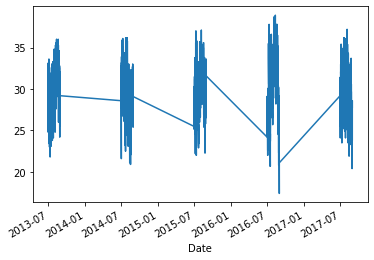

In [24]:
#série que vamos fazer previsão

data['Next_Tmax'].plot()


<AxesSubplot:xlabel='Date'>

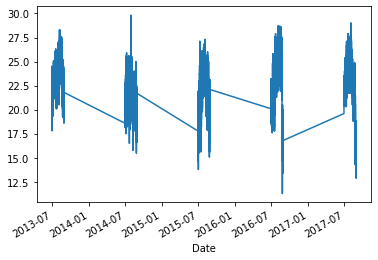

In [25]:
data['Next_Tmin'].plot()

<AxesSubplot:xlabel='Date'>

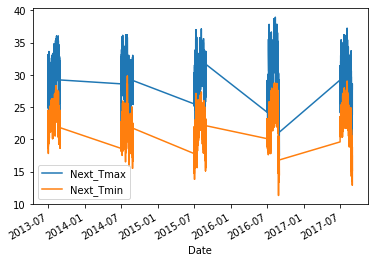

In [26]:
data[['Next_Tmax','Next_Tmin']].plot()

# 1. Análise descritiva dos dados 

Para fazer a análise descritiva mais detalhada do que foi feita na seção anterior do vou usar a blilioteca pandas-profiling, pois ela gera um resumo e apresenta o histograma de cada variável. 

In [27]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Muitas variáveis possuem a distribuição de frequência bem determinada, sendo assim fica fácil determinar os parâmetros da distribuição. Vou fazer a análise da distribuição da variável Next_Tmax

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0067591] [loc=30.242 scale=3.112]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.1614840] [loc=17.400 scale=12.842]
[distfit] >[pareto    ] [0.12 sec] [RSS: 0.1958853] [loc=-0.044 scale=17.444]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 0.0090895] [loc=30.349 scale=2.740]
[distfit] >[t         ] [0.16 sec] [RSS: 0.0067601] [loc=30.241 scale=3.112]
[distfit] >[genextreme] [0.27 sec] [RSS: 0.0049138] [loc=29.197 scale=3.216]
[distfit] >[gamma     ] [0.14 sec] [RSS: 0.0081005] [loc=-21.583 scale=0.193]
[distfit] >[lognorm   ] [0.35 sec] [RSS: 0.0070242] [loc=-608.940 scale=639.156]
[distfit] >[beta      ] [0.17 sec] [RSS: 0.0036484] [loc=11.509 scale=27.865]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.1032469] [loc=17.400 scale=21.500]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 0.0045454] [loc=19.062 scale=6.971]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\na=11.27, b=5.50, loc=11.51, scale=27.86'}, xlabel='Values', ylabel='Frequency'>)

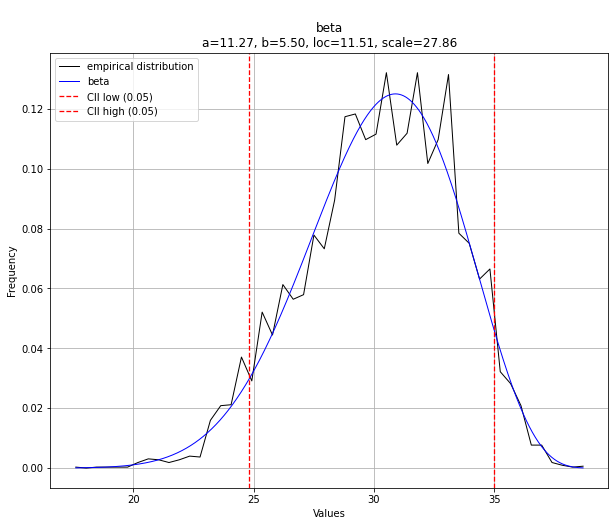

In [32]:
import distfit
from distfit import distfit

model = distfit()
model.fit_transform(data.Next_Tmax.values)
model.plot()

Correlação é uma medida estatística que expressa até que ponto duas variáveis estão linearmente relacionadas (o que significa que elas mudam juntas a uma taxa constante). É uma ferramenta comum para descrever relacionamentos simples sem fazer uma declaração sobre causa e efeito. As correlações são úteis para descrever relacionamentos simples entre os dados. 

In [33]:
#A tabela a seguir é muito útil, porém fica difícil tirar informações com essa quantidade de variáveis
data.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar_radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,0.014709,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,0.004306,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.002393,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,-0.019779,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,-0.021646,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.028663,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.014256,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,-0.008548,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.031498,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.002352,-0.459705,-0.012877


In [34]:
#Para reduzir a quantidade de informação da tabela acima vou restringir a análise à variável de interesse
corr = data.corr()
corr_tmax = corr[['Next_Tmax']]
corr_tmax

,Next_Tmax
station,0.107747
Present_Tmax,0.610357
Present_Tmin,0.463523
LDAPS_RHmin,-0.446824
LDAPS_RHmax,-0.289788
LDAPS_Tmax_lapse,0.835729
LDAPS_Tmin_lapse,0.592119
LDAPS_WS,-0.351107
LDAPS_LH,0.156779
LDAPS_CC1,-0.459705


<AxesSubplot:>

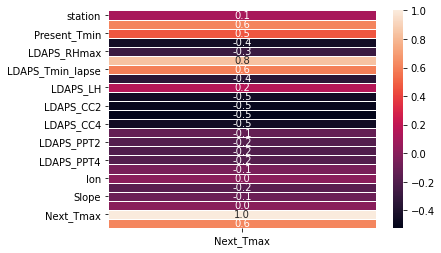

In [33]:
# plot da matriz de correlação para a variável Next_Tmax
import seaborn as sn
plot = sn.heatmap(corr_tmax, annot = True, fmt=".1f", linewidths=.8)
plot

As variáveis Present_Tmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Next_Tmin, LDAPS_CC4, LDAPS_CC3, LDAPS_CC2, LDAPS_CC1, LDAPS_RHmin, Present_Tmin apresentaram as maiores correlações lineares, mas isso não significa que as outras variáveis não possuem importância na análise da Next_Tmax. É preciso fazer outros tipos de análise para poder ter mais certeza das variáveis com mais importância. 

# 2.1 Machine Learning Classifier

Depois de preparar e analisar de maneira preliminar a correlação no conjunto de dados, vou selecionar e aplicar um modelo para obter a saída necessária em termos de variáveis ou classes contínuas, além de avaliar a eficácia do modelo com base em algumas métricas de desempenho.

Existem diferentes métricas de desempenho para modelos de aprendizado de máquina de regressão e classificação. Em geral, as métricas de desempenho de algoritmos de classificação de aprendizado de máquina são usadas para otimizar um modelo.

As métricas de classificação usadas serão:

- A acurácia é uma boa indicação geral de como o modelo performou. 
- A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. 
- O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. 
- O F1-Score é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação.

In [37]:
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(["Classification_Tmax","Next_Tmax"], axis=1),data["Classification_Tmax"], test_size = .30, random_state= 28)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5311, 23), (2277, 23), (5311,), (2277,))

In [39]:
#pipeline para realizar os k-folds no conjunto de treino
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier(n_estimators=100))
#grid de Hiperparâmetros para serem testados
hyperparameters = { 'randomforestclassifier__max_features' : ['sqrt'],
                  'randomforestclassifier__min_samples_leaf': [9, 10, 11,12],
                   'randomforestclassifier__max_depth': [12, 13,14,15],
                   'randomforestclassifier__min_samples_split': [2, 3,4,5]}  
         
# Grid para k-fold de 10 dobras
clf = GridSearchCV(pipeline, hyperparameters, cv=10)


In [40]:
%%time
#Ajusta o modelo aos dados de treino
model=clf.fit(x_train,y_train)

CPU times: user 11min 54s, sys: 716 ms, total: 11min 54s
Wall time: 11min 58s


In [41]:
p = model.predict(x_test)

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test, p))

               precision    recall  f1-score   support

  Temp_ClassI       0.90      0.89      0.90      1044
 Temp_ClassII       0.85      0.91      0.88      1134
Temp_ClassIII       0.83      0.38      0.52        99

     accuracy                           0.87      2277
    macro avg       0.86      0.73      0.77      2277
 weighted avg       0.87      0.87      0.87      2277



No geral o algoritmo performou bem, como pode ser verificado nos scores obtidos. A TclassIII apresentou recall e f1-score baixos, porém já era esperado uma vez que essa classe classe ficou com um número baixo de elementos. Agora vou implementar um algorimo de regressão.

# 2.2 (EXTRA) Machine Learning Regressor


In [53]:

X = data.drop(["Next_Tmax","Classification_Tmax"], axis=1)
Y = data["Next_Tmax"].copy()

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(X.astype(np.float64))

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .30, random_state= 28)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5311, 23), (2277, 23), (5311,), (2277,))

In [55]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Número de árvores na floresta aleatória 
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Número de recursos a serem considerados em cada divisão
max_features = ['auto', 'sqrt']
# Número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [5, 10]

# criando a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [58]:
# buscando os melhores hyperparameters

# Pesquisa aleatória de parâmetros, usando validação cruzada de 3 vezes,
# pesquise em 100 combinações diferentes e use todos os núcleos disponíveis
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [59]:
# agora vamos ver como o RMSE muda para cada configuração de parâmetro
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

2.267957654119497 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
2.251498401112549 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.9807081985864411 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
1.029757365261762 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
2.393891479155114 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.9401854636989079 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.9430417932898763 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.9961545571651587 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
2.3901011302770843 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.9776237963830151 {'n_estimators': 110, 'min_samples_

In [60]:
# melhor modelo 
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, n_jobs=-1)

In [61]:
# melhor combinação de hiperparametros
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 45}

[CV] END max_depth=1, max_features=auto, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END max_depth=1, max_features=auto, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=65; total time=   0.9s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=65; total time=   0.9s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=10, n_estimators=65; total time=   1.0s
[CV] END max_depth=45, max_features=auto, min_samples_split=10, n_estimators=20; total time=   1.3s
[CV] END max_depth=45, max_features=auto, min_samples_split=10, n_estimators=20; total time=   1.0s
[CV] END

In [62]:
# Métricas de desempenho (MAPE) 
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Métricas de desempenho (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calcular erro percentual absoluto médio (MAPE)
accuracy = 100 - mape    

print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 98.95 %


In [40]:
# RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.42


In [63]:
# extrair os valores numéricos de importância do recurso da pesquisa da grade 
importances = rf_random.best_estimator_.feature_importances_

#criar uma lista de recursos do conjunto de dados original (lista de colunas)

feature_list = list(data.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#crie duas listas da lista anterior de tuplas
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance           feature
0     0.250453  LDAPS_Tmax_lapse
1     0.106391      Present_Tmax
2     0.104068         Next_Tmax
3     0.080462  LDAPS_Tmin_lapse
4     0.079901         LDAPS_CC3
5     0.058027         LDAPS_CC2
6     0.048531         LDAPS_CC1
7     0.041574         LDAPS_CC4
8     0.032340          LDAPS_WS
9     0.030494       LDAPS_RHmin
10    0.030482      Present_Tmin
11    0.025935   Solar_radiation
12    0.020909        LDAPS_PPT2
13    0.016565        LDAPS_PPT1
14    0.013292       LDAPS_RHmax
15    0.012819        LDAPS_PPT3
16    0.011670          LDAPS_LH
17    0.011278        LDAPS_PPT4
18    0.005985               DEM
19    0.005956           station
20    0.004807               lon
21    0.004160               lat
22    0.003899             Slope


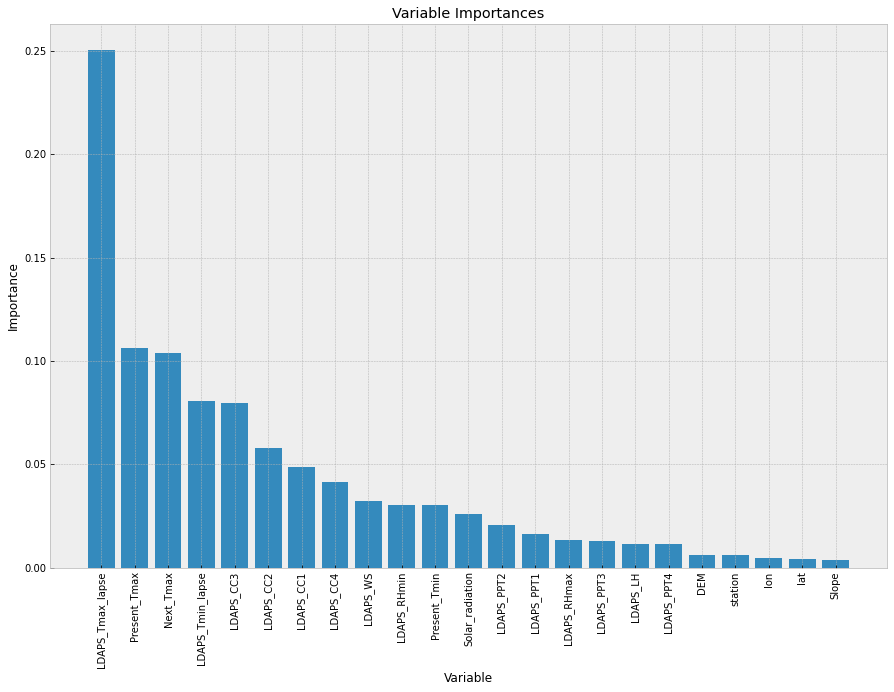

In [64]:
#plot
plt.style.use('bmh')

x_values = list(range(len(feature_importance)))


plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')

plt.xticks(x_values, feature, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [65]:
final_model = rf_random.best_estimator_
# Previsão de resultados de conjunto de teste
y_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test.values, y_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.98


In [66]:
#calcular a precisão
errors = abs(y_pred - y_test)
# Calcular erro percentual absoluto médio (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calcular e exibir precisão
accuracy = 100 - mape    

print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 97.55 %


Text(0.5, 0, 'Tree depth')

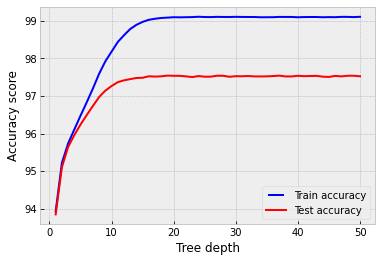

In [67]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(x_train, y_train)    
    #precisão de computação para dados de treino
    housing_tree = dt.predict(x_train)
    errors = abs(housing_tree - y_train)
    # Calcular erro percentual absoluto médio (MAPE)
    mape = 100 * (errors / y_train)
    # Calcular e exibir precisão
    accuracy = 100 - np.mean(mape)
    #anexar resultados de precisão
    train_results.append(accuracy)
    
    #anexar resultados de precisão
    housing_tree = dt.predict(x_test)
    errors = abs(housing_tree - y_test)
    # Calcular erro percentual absoluto médio (MAPE)
    mape = 100 * (errors / y_test)
    # Calcular e exibir precisão
    accuracy = 100 - np.mean(mape)
    #anexar resultados de precisão
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')

Apesar de ter chegado em boas respostas, com mais tempo de trabalho os algoritmos apresentados poderiam ser melhor otimizados , uma vez que na atual solução só foi feito um grid search em um algoritmo (Random Forest). Provavelmente eu iria rever as classes criadas na classificação para deixar os dados melhor distribuídos, utilizaria a biblioteca Hyperopt para buscar melhores configurações para os parâmetros e pesquisaria outros algoritmos de Machine Learning para poder comparar os resultados.